<h1>Elliptic curve Cryptography</h1>
<p>
    Handout zur Präsentation
</p>

<h2>
    Einleitung
</h2>
<p>
        Die Elliptic Curve Kryptograpie ist ein asymmetrisches Kryptosystem1. Bei asymmetrischen 
Kryptosystemen benötigen die miteinander kommunizierenden Parteien, keinen im Voraus 
definierten und ausgetauschten gemeinsamen (geheimen) Schlüssel. Ein solcher gemeinsamer 
Schlüssel ist bei asymmetrischen Kryptosystemen nicht nötig, da jede Partei seinen eigenen 
Schlüssel erzeugen kann, der aus einem privaten, geheimen Teil, und aus einem öffentlichen, 
nicht geheimen Teil besteht. Deshalb wird bei asymmetrischen Kryptosystemen auch von Public
Key-Verfahren gesprochen. Bis zum Bekanntwerden der asymmetrischen Kryptosystemen waren 
nur symmetrische Kryptosysteme verfügbar, also Kryptosysteme bei denen beide Parteien einen 
vordefinierten, gemeinsamen Schlüssel benötigten, was das Problems des Schlüsselaustauschs 
hat. Das RSA2-Verfahren wurde 1977 bekannt und war das erste veröffentlichte asymmetrische 
Verschlüsselungsverfahren (Weitz, 2021, S. 101). Das RSA-Verfahren basiert auf dem Problem 
der Primfaktorzerlegung. Die Multiplikation von (sehr grossen) Primzahlen ist einfach, d.h. schnell 
möglich, während die Zerlegung des Produktes in seine einzelnen (Prim-)Faktoren sehr 
aufwändig (und daher langsam) ist. Neben der Primfaktorzerlegung gibt es Kryptossysteme 
welche auf dem diskreten Logarithmusproblem basieren. Das diskrete Logarithmusproblem 
baut darauf auf, dass kein effizienter Weg bekannt ist, wie der diskrete Logarithmus berechnet 
werden kann. Während die diskrete Potenzfunktion leicht zu berechnen ist, kann der diskrete 
Logarithmus, also der Exponent zur Basis, nur schwer berechnet werden. Kryptosysteme welche 
auf dem diskreten Logarithmenproblem basieren sind z.B. der Diffie-Hellman
Schlüsselaustausch oder das ElGamal-Signaturverfahren (Witt, 2014, S. 175–176). In den 1980er 
Jahren wurde die Elliptic Curve Cryptography (ECC) eingeführt welche auf dem verallgemeinerten 
diskreten Logarithmusproblem basiert, wodurch z.B. der Diffie-Hellman-Schlüsselaustausch 
oder Signaturen auch mit Elliptischen Kurven realisiert werden kann (Paar et al., 2024, S. 277). 
Die Motivation für die Elliptic Curve Cryptography ist, dass die Schlüssel im Vergleich zu anderen 
Algorithmen wie z.B. Diffie-Hellman oder ElGamal kürzer sein können, um das gleiche 
Sicherheitsniveau zu erreichen. Um ein Sicherheitsniveau zu erreichen, dass bei einer 
symmetrischen Verschlüsselung (z.B.: AES3) eine Schlüssellänge von 256 Bits benötigt, genügt 
bei Elliptic Curve eine Schlüssellänge von 512 Bits, während z.B. Diffie-Hellman oder ElGamal 
eine Schlüssellänge von 15360 Bits benötigen würden (Paar et al., 2024, S. 186). Des Weiteren 
wächst die Schlüssellänge von Elliptic Curve linear mit der Sicherheitsstufe (Security Level), 
während die Schlüssellänge von Diffie Hellman oder ElGamal im Vergleich dazu quadratisch 
wachsen, was die Elliptic Curve bei höheren Sicherheitsstufen besonders effizient macht, da 
kürzere Schlüssel weniger Ressourcen (z.B.: Speicher, CPU, oder Bandreite in der Übertragung 
des Public-Keys) benötigen. Dies ist einerseits auf der Server-Seite relevant, da z.B. ein 
Webserver für jeden Aufruf der Webseite mit https einen Key Exchange durchführen muss, was 
Ressourcen benötigt. Auf der Client-Seite bringen kürzere Schlüssel den Vorteil, dass sie auch 
von mobilen Geräten oder eingebetteten Systemen mit geringer Rechenleistung durchgeführt 
werden können.
</p>

<h2>Definition der Elliptic Curve</h2>
<p>
Die Gleichung für die Elliptische Kurve lautet 𝑦<sup>2</sup> = 𝑥<sup>3</sup> + 𝑎 ∙ 𝑥 + 𝑏  und ist eine besondere Art der Polynomgleichung. Elliptische Kurven sind die Menge der Punkte (x, y) welche die Gleichung 𝑦<sup>2</sup> = 𝑥<sup>3</sup> +𝑎∙𝑥+𝑏 erfüllen, zusammen mit einem definierten Punkt 𝒪 in der Unendlichkeit als neutrales Element. Die Menge der Punkte (x, y) welche die Gleichung erfüllen, können dabei in 
der komplexen Zahlenebene ℂ liegen (da die Gleichung der Elliptischen Kurve den Grad 3 hat), in den reelen Zahlen ℝ oder einer abgeschlossenen Gruppe ℤ/pℤ. Im Folgenden wird der Komplexe Zahlenraum aber nicht weiter beachtet. Für die grafische Darstellung wird ℝ verwendet, da sich darin die Elliptische Kurve gut darstellen lässt und für die Berechnung wird ℤ/pℤ verwendet, da dieser für die kryptographische Anwendung relevant ist. Die Gleichung für die Elliptische Kurven wie sie in der der Kryptographie Anwendung findet lautet daher 𝒚𝟐 = 𝒙𝟑 + 𝒂 ∙ 𝒙 + 𝒃 𝒎𝒐𝒅 𝒑 wobei p prim > 3 ist. 
Abbildung 1: EC (a=-1, b= 1) in ℝ  
Abbildung 2: EC (a=b=2) in ℤ/17ℤ 
Abbildung 3: EC in ℂ 
In den 3 obenstehenden Abbildungen, sind Darstellungen von Elliptischen Kurven über ℝ, ℤ/pℤ und ℂ. In der untenstehenden Abbildung 4, sind Elliptische Kurven für verschiedenen Parameter für a und b im Wertebereich von ℝ -3 bis 3 dargestellt. 
Wie in der Abbildung 4 ersichtlich ist, ist die Elliptische Kurve symmetrisch zu ihrer xAchse. Dies wird schnell ersichtlich, wenn die Gleichung nach y aufgelöst wird, was y = ±√𝑥<sup>3</sup>+𝑎∙𝑥+𝑏  entspricht. In der 
Abbildung 4 ist die positive Lösung 𝑦 = +√𝑥<sup>3</sup> +𝑎∙𝑥+𝑏 <em style="color:blue;">blau</em> und die negative Lösung 𝑦′ =−√𝑥3+𝑎∙𝑥+𝑏 <em style="color:orange;">orange</em> dargestellt. Bei der zweiten Abbildung in der dritten Reihe mit den Werten a = 0 und b = 0 handelt es sich um eine Kurve die eine Spitze (Singularität) besitzt. Elliptische Kurven für die Kryptographie dürfen per 
Definition nicht singulär sein, d.h. sie dürfen keine Scheitelpunkte oder Schnittpunkte mit sich selbst haben. Um 
dies zu erfüllen, müssen die Parameter a und b der Elliptische Kurve zusätzlich die Bedingung 4 ∙ 𝑎3 +27∙𝑏2 ≠ 0 erfüllen. Abbildung 4: Elliptic Curves mit verschiedenen Werten für die Parameter a und b Für die Kryptographie mit dem diskreten Logarithmenproblem wird ein Restklassenring (cyclic group) benötigt. Die Gruppenelemente sind dabei jene Punkte, welche die Gleichung für die Elliptische Kurve erfüllen, also die Punkte die sich auf der Kurve befinden und der Punkt 𝒪. Für die Berechnung werden die Gruppenoperationen benötigt, welche im Folgenden eingeführt werden. 
</p>

In [26]:
# Eliptic Curve: y**2 = x**3 + a * x + b
# Definition der Konstanten (per naming convention in Python wäre konstanten Uppercase, aus Gründen der anpassung an die mathematische Schreibweise werden sie im Folgenden mit Kleinbuchstaben geschrieben)
a = -1
b = 1

# Punkte für den Berechnungsraum von x definieieren
points = [x/1000 for x in range(-2000, 2001)] #[-2.0, -1.999, -1.998, -1.997, ..., 1.997, 1.998, 1.999, 2.0]
print(f"Wertebereich für x:{{{f'{points[:3]}'[1:-1]}, ... ,{f'{points[-3:]}'[1:-1]}}}")
# Ellipitc Curve aufgelöst nach y: sqrt(y**2 = x**3 + a * x + b)
# y = +- sqrt((x**3 + a * x + b))
y_pos = [(x**3 + a * x + b)**0.5 for x in points if not (x**3 + a * x + b) < 0]
y_neg = [-1*y for y in y_pos]
x = [x for x in points if not (x**3 + a * x + b) < 0]


Wertebereich für x:{-2.0, -1.999, -1.998, ... ,1.998, 1.999, 2.0}


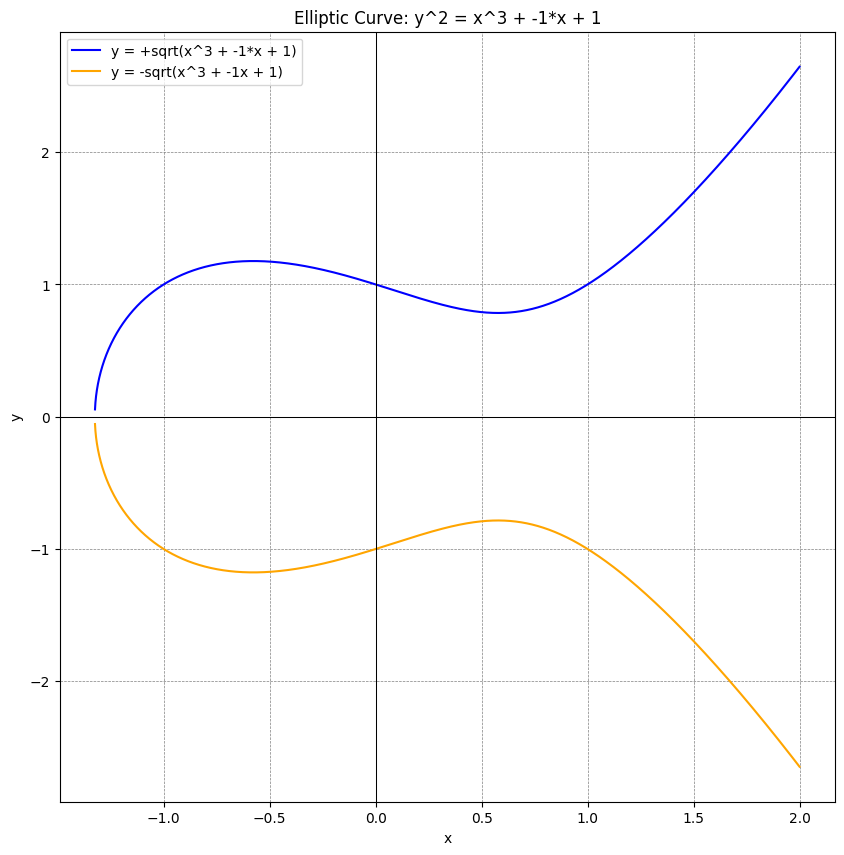

In [27]:
#elliptic curve darstellen:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))
plt.plot(x, y_pos, 'blue', label=f'y = +sqrt(x^3 + {a}*x + {b})')
plt.plot(x, y_neg, 'orange', label=f'y = -sqrt(x^3 + {a}x + {b})')
plt.axhline(0, color='black',linewidth=0.75)
plt.axvline(0, color='black',linewidth=0.75)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title(f'Elliptic Curve: y^2 = x^3 + {a}*x + {b}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

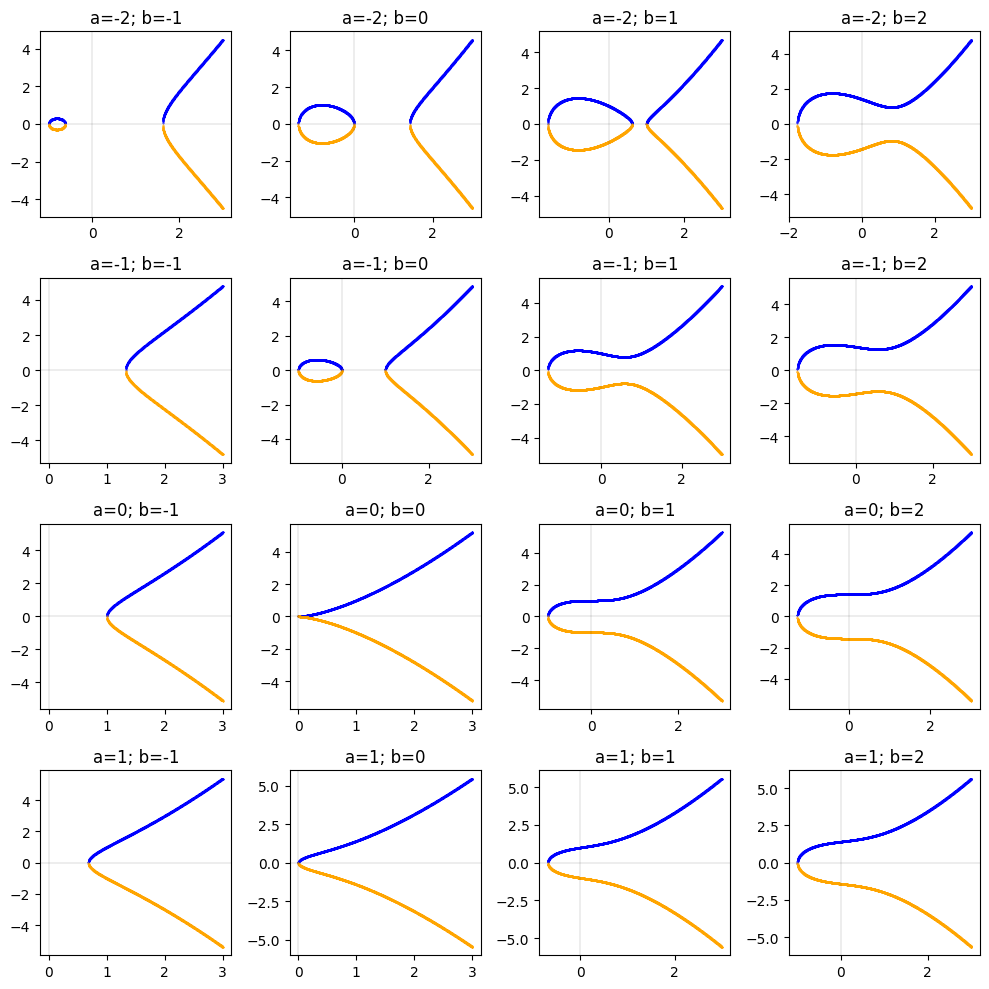

Wertebereich für x:{-3.0, -2.999, -2.998, ... ,2.998, 2.999, 3.0}


In [28]:
# Eliptic Curve: y**2 = x**3 + a * x + b
# Definition der Konstanten (per naming convention in Python wäre konstanten Uppercase, aus Gründen der anpassung an die mathematische Schreibweise werden sie im Folgenden mit Kleinbuchstaben geschrieben)
import matplotlib.pyplot as plt 

a = [-2, -1, 0, 1]
b = [-1, 0, 1, 2]

fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i, subplt in enumerate(axs.flatten()):
    # Punkte für den Berechnungsraum von x definieieren
    points = [x/1000 for x in range(-3000, 3001)] #[-2.0, -1.999, -1.998, -1.997, ..., 1.997, 1.998, 1.999, 2.0]
    # Ellipitc Curve aufgelöst nach y: sqrt(y**2 = x**3 + a * x + b)
    # y = +- sqrt((x**3 + a * x + b))
    y_pos = [(x**3 + a[i//4] * x + b[i%4])**0.5 for x in points if not (x**3 + a[i//4] * x + b[i%4]) < 0]
    y_neg = [-1*y for y in y_pos]
    x = [x for x in points if not (x**3 + a[i//4] * x + b[i%4]) < 0]
    
    #elliptic curve darstellen:
    subplt.scatter(x=x, y=y_pos, c='blue', s=0.1)
    subplt.scatter(x=x, y=y_neg, c='orange', s=0.1)
    subplt.set_title(f'a={a[i//4]}; b={b[i%4]}')
    subplt.axhline(0, color='black',linewidth=0.1)
    subplt.axvline(0, color='black',linewidth=0.1)
plt.tight_layout()
plt.show()
print(f"Wertebereich für x:{{{f'{points[:3]}'[1:-1]}, ... ,{f'{points[-3:]}'[1:-1]}}}")

<h2>Gruppenoperationen: Addition und skalare Multiplikation</h2>
<p>
    Die graphische Repräsentation einer Addition von den zwei Punkten P + Q = R (wobei 𝑃 = 𝑥<sub>1</sub>,𝑦<sub>1</sub>), 𝑄 = (𝑥<sub>2</sub>,𝑦<sub>2</sub>) und 𝑅 = (𝑥<sub>3</sub>,𝑦<sub>3</sub>) entsprechen) ist folgendermassen: Es wird eine Linie durch die beiden Punkte P und Q gezogen. 
Der dritte Schnittpunkt R’ mit der Elliptischen Kurve dieser Linie durch P und Q, wird an der y-Achse gespiegelt und repräsentiert den Punkt R, also das Ergebnis der Addition von P und Q. Die Spiegelung ist nötig, damit der konstruierte Punkt R die Assoziativität einhält. Der gespiegelte Punkt R ist assoziativ, so dass gilt (P+Q)+R = P+(Q+R). 
Werden die Punkte P und Q auf der Elliptischen Kurve ganz nahe zueinander verschoben, wird die Gerade durch die beiden Punkte zur Tangente in P, wenn P = Q ist. Somit ist das Ergebnis der Addition eines Punktes P mit sich selbst, der Schnittpunkt R’, der Tangente mit der Elliptischen Kurve gespiegelt an der x-Achse. Die Addition kann beliebig oft wiederholt werden. Da das Ergebnis jeder weiteren Operation (2P, 3P, 4P, ...) liegt immer auf der Elliptischen Kurve und ist (bei geeigneter Parameterwahl a und b) eine geschlossene Gruppenoperation. Die Koordinaten der Punkte P, 2P, 3P wachsen dabei (im unbegrenzten Feld der reellen Zahlen, also ohne mod p) in der Länge quadratisch.
</p>

Wertebereich für x:{-1.0, -0.999, -0.998, ... ,3.997, 3.998, 3.999}


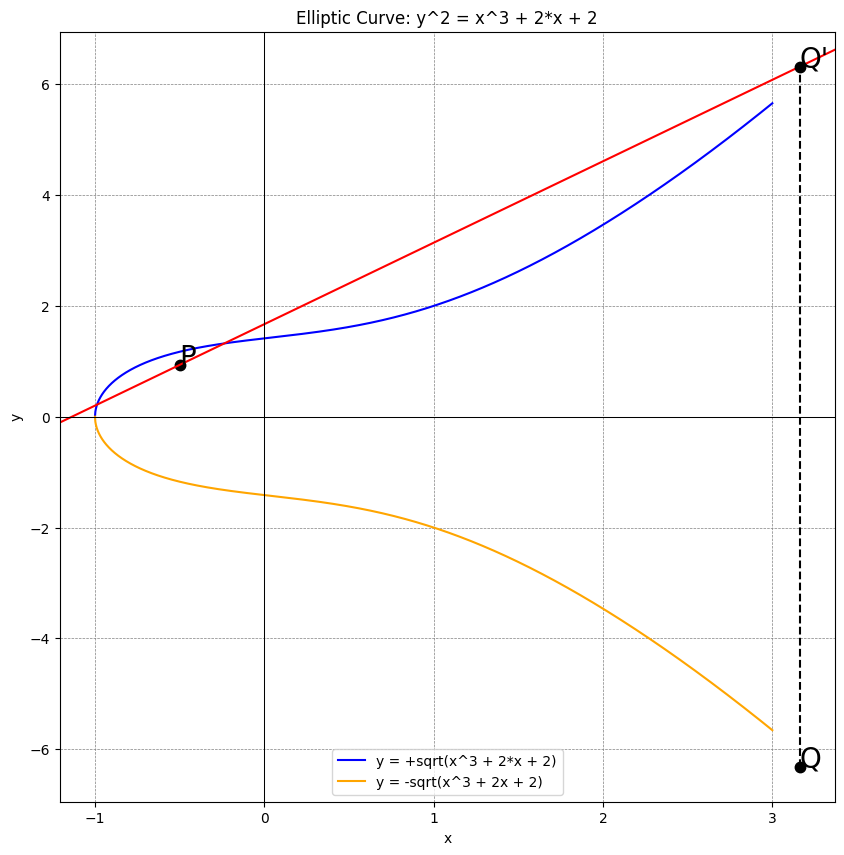

In [29]:
import matplotlib.pyplot as plt

def slope(a, b, x1, y1, x2=None, y2=None):
    if (x2==None or y2==None) or (x1==x2 and y1 == y2):
        # Erste Ableitung der EC
        return (3*x1**2+a)/(2*(x1**3+a*x1+b)**(0.5))
    elif (x1==x2 and y1 == -1*y2):
        return "infinite"
    else:
        return (y2-y1)/(x2-x1)


def point_operation(s, x1, y1, x2=None, y2=None):
    if (x2==None or y2==None) or (x1==x2 and y1 == y2):
        x3 = s**2-x1-x1
        y3 = s*(x1-x3)-y1
        return (x3, y3)
    elif (x1==x2 and y1 == -1*y2):
        return "O" # neutral Element
    else:
        x3 = s**2-x1-x2
        y3 = s*(x1-x3)-y1
        return (x3, y3)
        
        
# Eliptic Curve: y**2 = x**3 + a * x + b
# Definition der Konstanten
a = 2
b = 2

# Set up Plot:
plt.figure(figsize=(10, 10))
plt.plot(x, y_pos, 'blue', label=f'y = +sqrt(x^3 + {a}*x + {b})')
plt.plot(x, y_neg, 'orange', label=f'y = -sqrt(x^3 + {a}x + {b})')

#Startpunkt P / Generator
x1 = -0.5
y1 = (x1**3 + a * x1 + b)**0.5 if not (x1**3 + a * x1 + b) < 0 else False
plt.plot(x1, y1, marker="o", markersize=7.5, markeredgecolor="black", markerfacecolor="black")
plt.text(x1, y1, "P", size='20')

#Tangente
plt.axline((x1, y1), slope=slope(a, b, x1, y1), c="red")

#Gespiegelter Schnittpunkt Punkt Q
x2, y2 = point_operation(slope(a, b, x1, y1), x1, y1)
plt.plot(x2, y2, marker="o", markersize=7.5, markeredgecolor="black", markerfacecolor="black")
plt.text(x2, y2,"Q", size='20')

plt.plot([x2, x2], [y2, -1*y2], c='black',linestyle = '--')
plt.plot(x2, -1*y2, marker="o", markersize=7.5, markeredgecolor="black", markerfacecolor="black")
plt.text(x2, -1*y2, "Q'", size='20')

lower_bound = int(min(x1, x2))-1
upper_bound = int(max(x1, x2))+1

# Punkte für den Berechnungsraum von x definieieren
points = [x/1000 for x in range(lower_bound*1000, upper_bound*1000)]
print(f"Wertebereich für x:{{{f'{points[:3]}'[1:-1]}, ... ,{f'{points[-3:]}'[1:-1]}}}")

# Ellipitc Curve aufgelöst nach y: sqrt(y**2 = x**3 + a * x + b)
# y = +- sqrt((x**3 + a * x + b))
y_pos = [(x**3 + a * x + b)**0.5 for x in points if not (x**3 + a * x + b) < 0]
y_neg = [-1*y for y in y_pos]
x = [x for x in points if not (x**3 + a * x + b) < 0]

plt.axhline(0, color='black',linewidth=0.75)
plt.axvline(0, color='black',linewidth=0.75)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title(f'Elliptic Curve: y^2 = x^3 + {a}*x + {b}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Wertebereich für x:{-2.0, -1.999, -1.998, ... ,1.998, 1.999, 2.0}


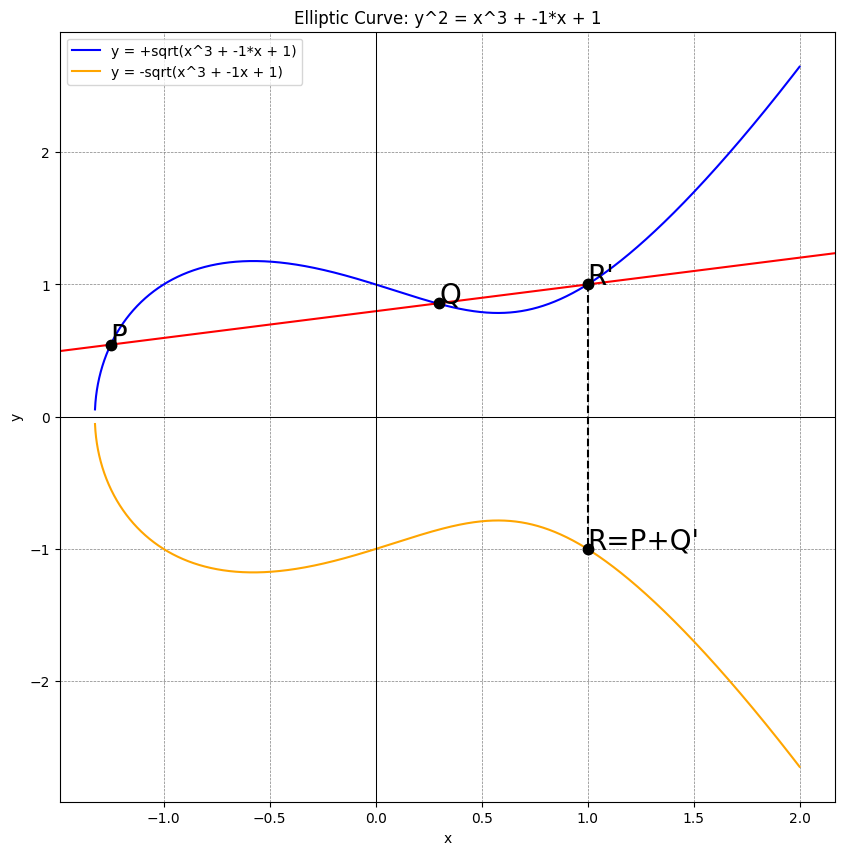

In [15]:
# Eliptic Curve: y**2 = x**3 + a * x + b
# Definition der Konstanten
b = 1 #2

# Punkte für den Berechnungsraum von x definieieren
points = [x/1000 for x in range(-2000, 2001)] #[-2.0, -1.999, -1.998, -1.997, ..., 1.997, 1.998, 1.999, 2.0]
print(f"Wertebereich für x:{{{f'{points[:3]}'[1:-1]}, ... ,{f'{points[-3:]}'[1:-1]}}}")
# Ellipitc Curve aufgelöst nach y: sqrt(y**2 = x**3 + a * x + b)
# y = +- sqrt((x**3 + a * x + b))
y_pos = [(x**3 + a * x + b)**0.5 for x in points if not (x**3 + a * x + b) < 0]
y_neg = [-1*y for y in y_pos]
x = [x for x in points if not (x**3 + a * x + b) < 0]
#elliptic curve darstellen:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))
plt.plot(x, y_pos, 'blue', label=f'y = +sqrt(x^3 + {a}*x + {b})')
plt.plot(x, y_neg, 'orange', label=f'y = -sqrt(x^3 + {a}x + {b})')

#plt.plot([-1.25, 1], [0.544862368, 1], c='red', label=f'y = m*x + c') # m=0.202283392, c=0.797716608
plt.axline((0, 0.797716608), slope=0.202283392, c="red")
# use axlineplt.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))

plt.plot(-1.25, 0.544862368, marker="o", markersize=7.5, markeredgecolor="black", markerfacecolor="black")
plt.text(-1.25, 0.544862368,"P", size='20')

#näherung für Punkt Q, wurde nicht ausgerechnet
plt.plot(0.3, 0.8584, marker="o", markersize=7.5, markeredgecolor="black", markerfacecolor="black")
plt.text(0.3, 0.8584,"Q", size='20')

plt.plot(1, 1, marker="o", markersize=7.5, markeredgecolor="black", markerfacecolor="black")
plt.text(1, 1,"R'", size='20')

plt.plot([1, 1], [1, -1], c='black',linestyle = '--')
plt.plot(1, -1, marker="o", markersize=7.5, markeredgecolor="black", markerfacecolor="black")
plt.text(1, -1,"R=P+Q'", size='20')


plt.axhline(0, color='black',linewidth=0.75)
plt.axvline(0, color='black',linewidth=0.75)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title(f'Elliptic Curve: y^2 = x^3 + {a}*x + {b}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [16]:
# Gerade definieren welche die Elliptische Kurve 3 mal schneidet
# Geradendefinition: y = m*x + n

Wertebereich für x:{-2.0, -1.999, -1.998, ... ,1.998, 1.999, 2.0}


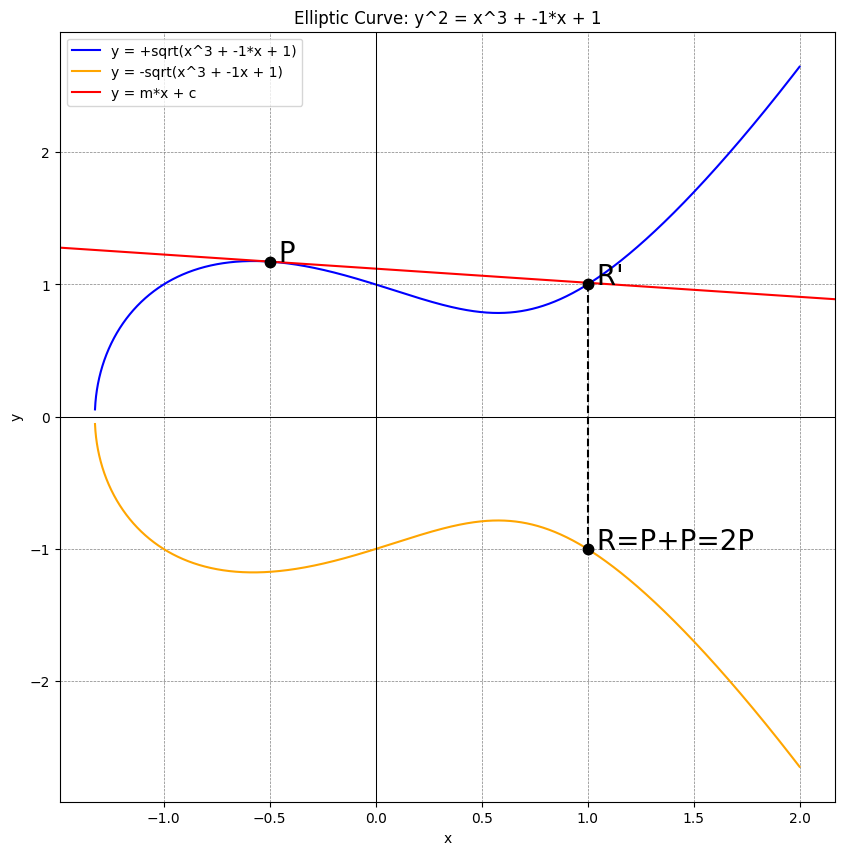

In [17]:
# Eliptic Curve: y**2 = x**3 + a * x + b
# Definition der Konstanten
b = 1 #2

# Punkte für den Berechnungsraum von x definieieren
points = [x/1000 for x in range(-2000, 2001)] #[-2.0, -1.999, -1.998, -1.997, ..., 1.997, 1.998, 1.999, 2.0]
print(f"Wertebereich für x:{{{f'{points[:3]}'[1:-1]}, ... ,{f'{points[-3:]}'[1:-1]}}}")
# Ellipitc Curve aufgelöst nach y: sqrt(y**2 = x**3 + a * x + b)
# y = +- sqrt((x**3 + a * x + b))
y_pos = [(x**3 + a * x + b)**0.5 for x in points if not (x**3 + a * x + b) < 0]
y_neg = [-1*y for y in y_pos]
x = [x for x in points if not (x**3 + a * x + b) < 0]
#elliptic curve darstellen:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))
plt.plot(x, y_pos, 'blue', label=f'y = +sqrt(x^3 + {a}*x + {b})')
plt.plot(x, y_neg, 'orange', label=f'y = -sqrt(x^3 + {a}x + {b})')

#slope is first derivative of elliptic curve: \frac{3x^{2} - 1}{2 \sqrt{x^{3} - x + 1}}
plt.axline((0, 1.119303761), slope=-0.106600358, c='red', label=f'y = m*x + c')
plt.plot(-0.5, 1.17260394, marker="o", markersize=7.5, markeredgecolor="black", markerfacecolor="black")
plt.text(-0.5, 1.17260394," P", size='20')

plt.plot(1, 1, marker="o", markersize=7.5, markeredgecolor="black", markerfacecolor="black")
plt.text(1, 1," R'", size='20')

plt.plot([1, 1], [1, -1], c='black',linestyle = '--')
plt.plot(1, -1, marker="o", markersize=7.5, markeredgecolor="black", markerfacecolor="black")
plt.text(1, -1," R=P+P=2P", size='20')


plt.axhline(0, color='black',linewidth=0.75)
plt.axvline(0, color='black',linewidth=0.75)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title(f'Elliptic Curve: y^2 = x^3 + {a}*x + {b}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h2>Addition mit sich selbst P+P = 2P</h2>

Wertebereich für x:{-2.0, -1.999, -1.998, ... ,1.998, 1.999, 2.0}


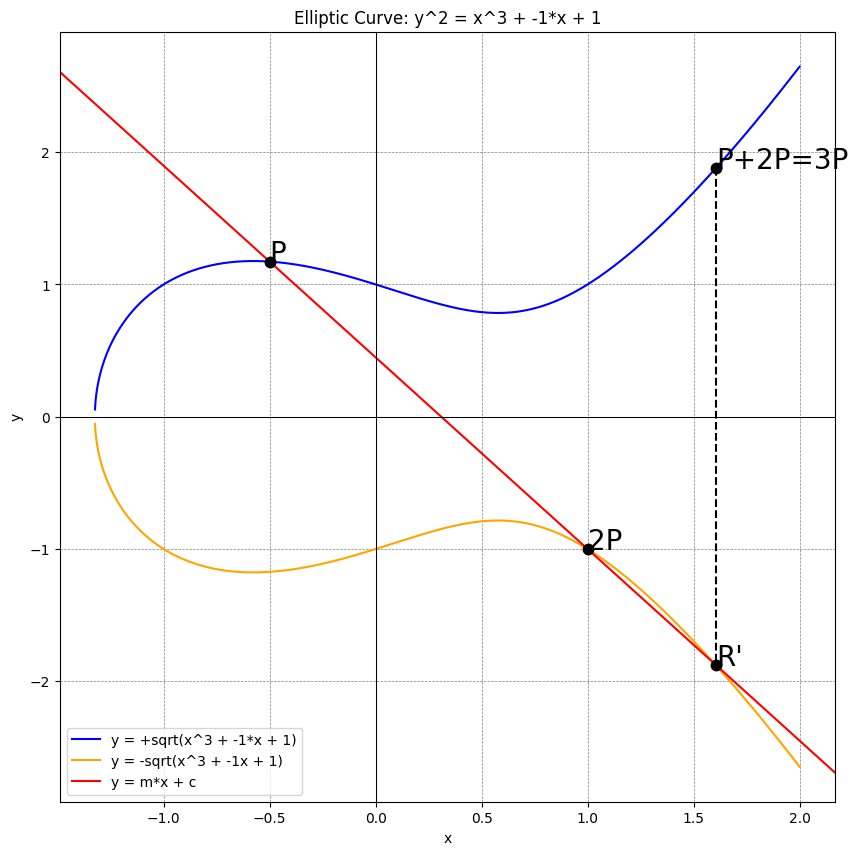

In [18]:
# Eliptic Curve: y**2 = x**3 + a * x + b
# Definition der Konstanten
b = 1 #2

# Punkte für den Berechnungsraum von x definieieren
points = [x/1000 for x in range(-2000, 2001)] #[-2.0, -1.999, -1.998, -1.997, ..., 1.997, 1.998, 1.999, 2.0]
print(f"Wertebereich für x:{{{f'{points[:3]}'[1:-1]}, ... ,{f'{points[-3:]}'[1:-1]}}}")
# Ellipitc Curve aufgelöst nach y: sqrt(y**2 = x**3 + a * x + b)
# y = +- sqrt((x**3 + a * x + b))
y_pos = [(x**3 + a * x + b)**0.5 for x in points if not (x**3 + a * x + b) < 0]
y_neg = [-1*y for y in y_pos]
x = [x for x in points if not (x**3 + a * x + b) < 0]
#elliptic curve darstellen:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))
plt.plot(x, y_pos, 'blue', label=f'y = +sqrt(x^3 + {a}*x + {b})')
plt.plot(x, y_neg, 'orange', label=f'y = -sqrt(x^3 + {a}x + {b})')

#slope is first derivative of elliptic curve: \frac{3x^{2} - 1}{2 \sqrt{x^{3} - x + 1}}
plt.axline((0, 0.448402627), slope=-1.448402627, c='red', label=f'y = m*x + c')
plt.plot(-0.5, 1.17260394, marker="o", markersize=7.5, markeredgecolor="black", markerfacecolor="black")
plt.text(-0.5, 1.17260394,"P", size='20')

plt.plot(1, -1, marker="o", markersize=7.5, markeredgecolor="black", markerfacecolor="black")
plt.text(1, -1,"2P", size='20')

plt.plot(1.606, -1.877, marker="o", markersize=7.5, markeredgecolor="black", markerfacecolor="black")
plt.text(1.606, -1.877,"R'", size='20')

plt.plot([1.606, 1.606], [1.877, -1.877], c='black',linestyle = '--')

plt.plot(1.606, 1.877, marker="o", markersize=7.5, markeredgecolor="black", markerfacecolor="black")
plt.text(1.606, 1.877,"P+2P=3P", size='20')


plt.axhline(0, color='black',linewidth=0.75)
plt.axvline(0, color='black',linewidth=0.75)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title(f'Elliptic Curve: y^2 = x^3 + {a}*x + {b}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h2>Inverse P + -P = 𝒪</h2>
<p>
    Der Punkt 𝒪 ist das neutrale Element (auch Identitätselement genannt) und liegt nicht auf der Elliptischen Kurve, sondern ist definiert in der Unendlichkeit so dass gilt 𝑃 + 𝒪 = 𝑃. In der grafischen Darstellung kann dieser Punkt 𝒪 bei + oder - unendlich Richtung der y-Achse vorgestellt werden. Wenn von Punkt P eine Gerade zum Punkt 𝒪 gezogen würde, kann diese Gerade als Vertikale angesehen werden, welche die Kurve beim Punkt -P schneidet. Wird dieser Punkt wieder an der x-Achse gespiegelt, kommt man zum ursprünglichen Punkt P zurück. Die Spiegelung des Punktes P an der x-Achse entspricht dem inversen Element, so dass 𝑃+ (−𝑃) = 𝒪 gegeben ist. 𝐹ü𝑟 𝑃=(𝑥1,𝑦1) gilt daher −𝑃=(𝑥1,−𝑦1). 
Im Feld von ℤ/pℤ entspricht −𝑦1 ≡𝑝−𝑦1 𝑚𝑜𝑑 𝑝 und der inverse Punkt daher −𝑃=(𝑥1,𝑝−𝑦1). Mit der eingeführten Gruppenoperation (Addition), dem neutralen Element 𝒪 und dem inversen Element -P, gibt es zyklische Subgruppen. Unter gewissen Bedingungen bilden sämtliche Punkte auf der Elliptic Curve eine Cyclic Group. Die gezeigten geometrischen Konstruktionen können durch analytische Ausdrücke (Formeln) errechnet werden. Die Betrachtung muss dabei nicht über den reellen Zahlen erfolgen wie im obigen Beispiel, sondern kann in einem Primzahlenfeld ℤ/pℤ (mod p) erfolgen. 
</p>

Wertebereich für x:{-2.0, -1.999, -1.998, ... ,1.998, 1.999, 2.0}


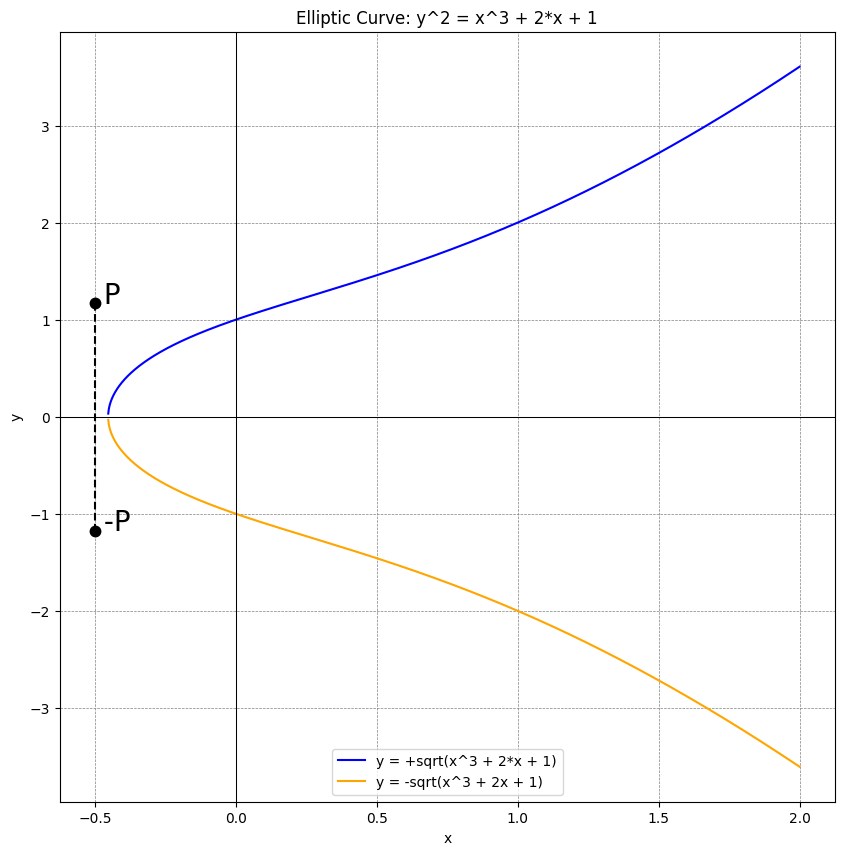

In [30]:
# Eliptic Curve: y**2 = x**3 + a * x + b
# Definition der Konstanten
b = 1 #2

# Punkte für den Berechnungsraum von x definieieren
points = [x/1000 for x in range(-2000, 2001)] #[-2.0, -1.999, -1.998, -1.997, ..., 1.997, 1.998, 1.999, 2.0]
print(f"Wertebereich für x:{{{f'{points[:3]}'[1:-1]}, ... ,{f'{points[-3:]}'[1:-1]}}}")
# Ellipitc Curve aufgelöst nach y: sqrt(y**2 = x**3 + a * x + b)
# y = +- sqrt((x**3 + a * x + b))
y_pos = [(x**3 + a * x + b)**0.5 for x in points if not (x**3 + a * x + b) < 0]
y_neg = [-1*y for y in y_pos]
x = [x for x in points if not (x**3 + a * x + b) < 0]
#elliptic curve darstellen:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))
plt.plot(x, y_pos, 'blue', label=f'y = +sqrt(x^3 + {a}*x + {b})')
plt.plot(x, y_neg, 'orange', label=f'y = -sqrt(x^3 + {a}x + {b})')

plt.plot(-0.5, 1.17260394, marker="o", markersize=7.5, markeredgecolor="black", markerfacecolor="black")
plt.text(-0.5, 1.17260394," P", size='20')

plt.plot(-0.5, -1.17260394, marker="o", markersize=7.5, markeredgecolor="black", markerfacecolor="black")
plt.text(-0.5, -1.17260394," -P", size='20')

plt.plot([-0.5, -0.5], [1.17260394, -1.17260394], c='black',linestyle = '--')

plt.axhline(0, color='black',linewidth=0.75)
plt.axvline(0, color='black',linewidth=0.75)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title(f'Elliptic Curve: y^2 = x^3 + {a}*x + {b}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Wertebereich für x:{0, 1, 2, ... ,13, 14, 15}


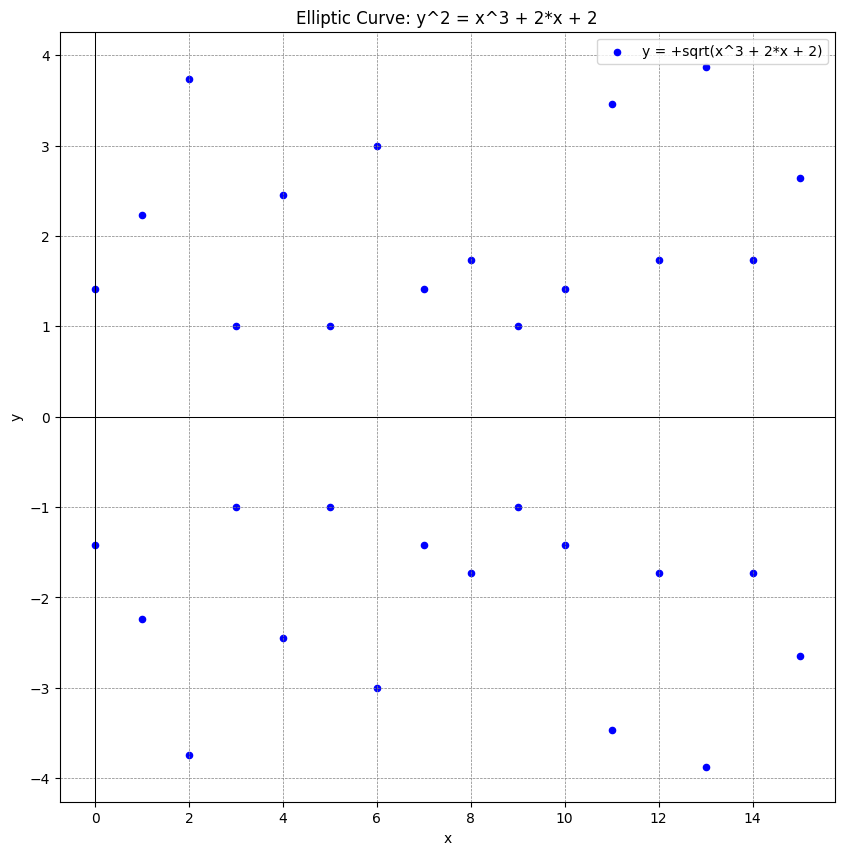

In [31]:
# Eliptic Curve: y**2 = x**3 + a * x + b
# Definition der Konstanten
b = 2
p = 17

# Punkte für den Berechnungsraum von x definieieren
points = [x for x in range(0, 16)] 
print(f"Wertebereich für x:{{{f'{points[:3]}'[1:-1]}, ... ,{f'{points[-3:]}'[1:-1]}}}")
# Ellipitc Curve aufgelöst nach y: sqrt(y**2 = x**3 + a * x + b)
# y = +- sqrt((x**3 + a * x + b))
#not correct, to do
y_pos = [(((x**3 + a * x + b)%p)**0.5) for x in points if not (x**3 + a * x + b) < 0]
y_neg = [-1*y for y in y_pos]
x = [x for x in points if not (x**3 + a * x + b) < 0]

#elliptic curve darstellen:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 10))
plt.scatter(x, y_pos, s=20, c='b', marker='o', label=f'y = +sqrt(x^3 + {a}*x + {b})')
plt.scatter(x, y_neg, s=20, c='b', marker='o')
plt.axhline(0, color='black',linewidth=0.75)
plt.axvline(0, color='black',linewidth=0.75)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title(f'Elliptic Curve: y^2 = x^3 + {a}*x + {b}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Wertebereich für x:{-2.0, -1.999, -1.998, ... ,1.998, 1.999, 2.0}


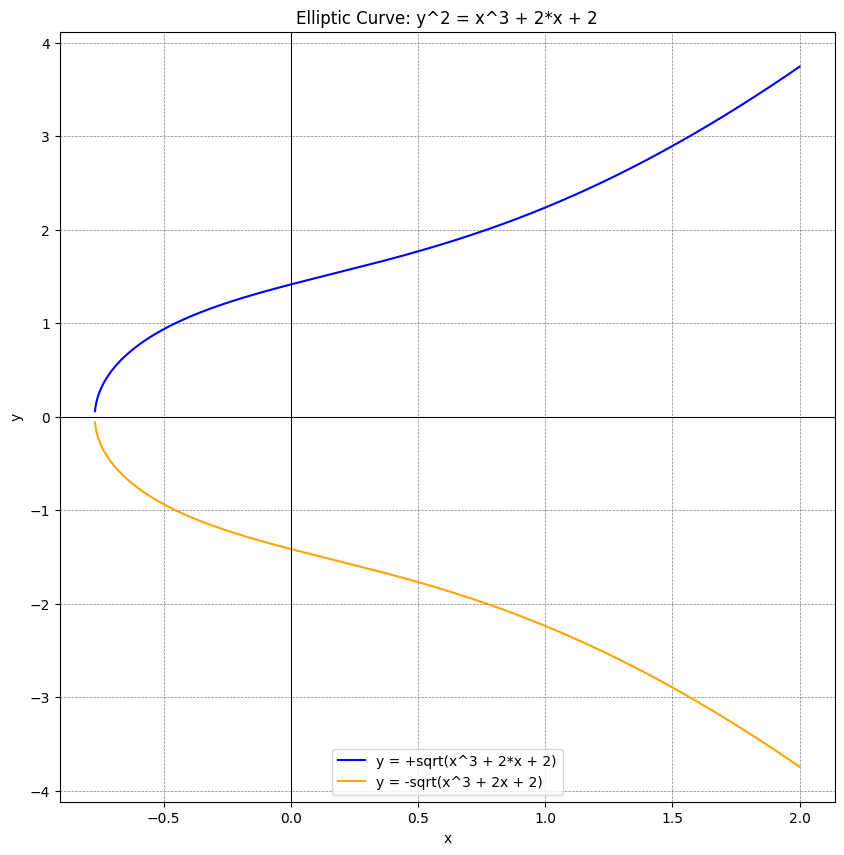

In [32]:
# Eliptic Curve: y**2 = x**3 + a * x + b
# Definition der Konstanten
b = 2

# Punkte für den Berechnungsraum von x definieieren
points = [x/1000 for x in range(-2000, 2001)] #[-2.0, -1.999, -1.998, -1.997, ..., 1.997, 1.998, 1.999, 2.0]
print(f"Wertebereich für x:{{{f'{points[:3]}'[1:-1]}, ... ,{f'{points[-3:]}'[1:-1]}}}")
# Ellipitc Curve aufgelöst nach y: sqrt(y**2 = x**3 + a * x + b)
# y = +- sqrt((x**3 + a * x + b))
y_pos = [(x**3 + a * x + b)**0.5 for x in points if not (x**3 + a * x + b) < 0]
y_neg = [-1*y for y in y_pos]
x = [x for x in points if not (x**3 + a * x + b) < 0]
#elliptic curve darstellen:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))
plt.plot(x, y_pos, 'blue', label=f'y = +sqrt(x^3 + {a}*x + {b})')
plt.plot(x, y_neg, 'orange', label=f'y = -sqrt(x^3 + {a}x + {b})')
plt.axhline(0, color='black',linewidth=0.75)
plt.axvline(0, color='black',linewidth=0.75)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title(f'Elliptic Curve: y^2 = x^3 + {a}*x + {b}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()